# Imports

In [71]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [72]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [73]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Exploratory Data Analysis

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [75]:
df.describe(include="all")

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

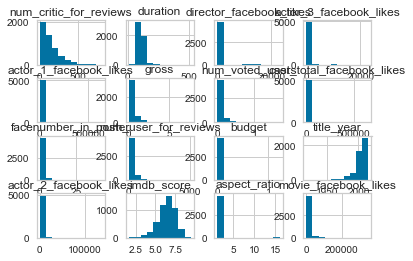

In [76]:
df.hist()

In [77]:
df["imdb_score"].isna().sum()

0

# Preprocess Data

Drop categorical columns

In [78]:
df = df.select_dtypes(exclude=["object"])
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

dropping na values for imbd_score

In [79]:
df = df.dropna(subset=["imdb_score"], axis=0)
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
title_year                    2.141582
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
duration                      0.297442
facenumber_in_poster          0.257783
actor_2_facebook_likes        0.257783
actor_1_facebook_likes        0.138806
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
imdb_score                    0.000000
movie_facebook_likes          0.000000
dtype: float64

Remove the in-between imdb_score of low and high

In [80]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)

<AxesSubplot:xlabel='imdb_score', ylabel='count'>

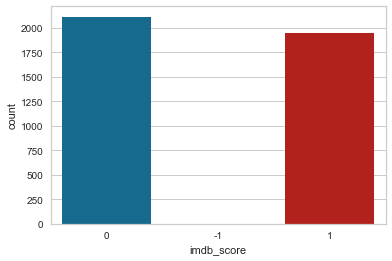

In [81]:
sns.countplot(x="imdb_score", data=df)

array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

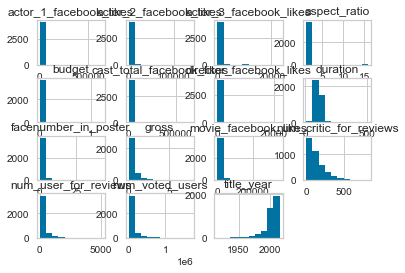

In [82]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X.hist()

impute values with median

In [83]:
X = X.fillna(X.median())
X.isna().sum()

actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
director_facebook_likes      0
duration                     0
facenumber_in_poster         0
gross                        0
movie_facebook_likes         0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
title_year                   0
dtype: int64

In [84]:
X.skew().sort_values()

title_year                   -2.325091
num_critic_for_reviews        1.603447
duration                      2.345782
gross                         3.715868
num_voted_users               3.898543
num_user_for_reviews          3.958767
facenumber_in_poster          4.808983
movie_facebook_likes          5.038857
director_facebook_likes       5.290803
actor_3_facebook_likes        7.407084
aspect_ratio                  9.363107
actor_2_facebook_likes       11.377389
cast_total_facebook_likes    14.099733
actor_1_facebook_likes       20.410924
budget                       46.189648
dtype: float64

array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

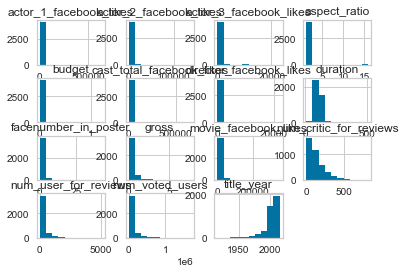

In [85]:
X.hist()

Remove irrelavant features

In [86]:
corr = X
corr['target'] = y.values.astype(int)
target_correlation = corr.corr()['target'].abs().sort_values(ascending=False)[1:]
target_correlation

num_voted_users              0.353366
num_critic_for_reviews       0.288317
num_user_for_reviews         0.271541
duration                     0.247806
movie_facebook_likes         0.233752
title_year                   0.197169
director_facebook_likes      0.156304
gross                        0.154261
actor_2_facebook_likes       0.069484
facenumber_in_poster         0.068916
cast_total_facebook_likes    0.061710
actor_1_facebook_likes       0.055344
aspect_ratio                 0.051870
actor_3_facebook_likes       0.030477
budget                       0.026773
Name: target, dtype: float64

Seems like there's a steep jump from director_facebook_likes to facenumber_in_poster, so it's probably a good idea to remove anything below director_facebook_likes

In [87]:
X = X[target_correlation[:'gross'].index]
X

,num_voted_users,num_critic_for_reviews,num_user_for_reviews,duration,movie_facebook_likes,title_year,director_facebook_likes,gross
0,886204,723.0,3054.0,178.0,33000,2009.0,0.0,760505847.0
1,471220,302.0,1238.0,169.0,0,2007.0,563.0,309404152.0
3,1144337,813.0,2701.0,164.0,164000,2012.0,22000.0,448130642.0
4,8,106.0,156.0,103.0,0,2005.0,131.0,24800000.0
6,383056,392.0,1902.0,156.0,0,2007.0,0.0,336530303.0
...,...,...,...,...,...,...,...,...
5036,36,106.0,1.0,84.0,4,2005.0,2.0,24800000.0
5038,629,1.0,6.0,87.0,84,2013.0,2.0,24800000.0
5039,73839,43.0,359.0,43.0,32000,2005.0,47.0,24800000.0
5040,38,13.0,3.0,76.0,16,2013.0,0.0,24800000.0


# Model

## KNN - No Split

In [88]:
normalizer=MinMaxScaler().fit(X)
X_norm=pd.DataFrame(normalizer.transform(X), columns=X.columns)
X_norm

,num_voted_users,num_critic_for_reviews,num_user_for_reviews,duration,movie_facebook_likes,title_year,director_facebook_likes,gross
0,0.524453,0.889163,0.603479,0.339286,0.094556,0.93,0.000000,1.000000
1,0.278865,0.370690,0.244515,0.321429,0.000000,0.91,0.025591,0.406840
2,0.677216,1.000000,0.533702,0.311508,0.469914,0.96,1.000000,0.589253
3,0.000002,0.129310,0.030638,0.190476,0.000000,0.89,0.005955,0.032610
4,0.226690,0.481527,0.375766,0.295635,0.000000,0.91,0.000000,0.442508
...,...,...,...,...,...,...,...,...
4062,0.000018,0.129310,0.000000,0.152778,0.000011,0.89,0.000091,0.032610
4063,0.000369,0.000000,0.000988,0.158730,0.000241,0.97,0.000091,0.032610
4064,0.043695,0.051724,0.070765,0.071429,0.091691,0.89,0.002136,0.032610
4065,0.000020,0.014778,0.000395,0.136905,0.000046,0.97,0.000000,0.032610


In [89]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_norm,y)
y_pred = knn.predict(X_norm)

Classification Report: 
               precision    recall  f1-score   support

         LOW       0.86      0.90      0.88      2115
        HIGH       0.88      0.84      0.86      1952

    accuracy                           0.87      4067
   macro avg       0.87      0.87      0.87      4067
weighted avg       0.87      0.87      0.87      4067
 

Accuracy:  0.8704204573395623 



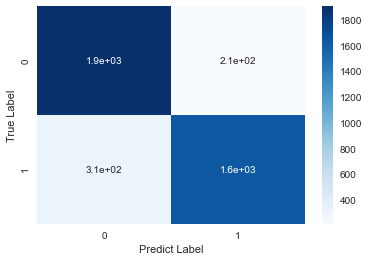

In [90]:
print("Classification Report: \n", metrics.classification_report(y,y_pred, target_names=["LOW","HIGH"]),'\n')
print("Accuracy: ",metrics.accuracy_score(y,y_pred),'\n')
cf=metrics.confusion_matrix(y,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

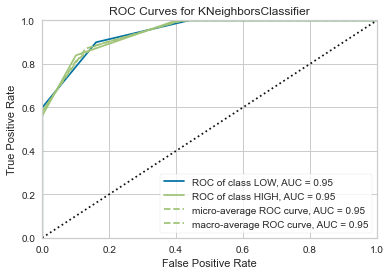

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [91]:
visualizer = ROCAUC(knn, classes=["LOW","HIGH"])
visualizer.fit(X_norm, y)        
visualizer.score(X_norm,y.astype(int))       
visualizer.show()   

## KNN - Train & Test Splitting

In [92]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
X_train

,num_voted_users,num_critic_for_reviews,num_user_for_reviews,duration,movie_facebook_likes,title_year,director_facebook_likes,gross
3452,0.001229,0.052956,0.003953,0.176587,0.000642,0.81,0.010091,0.032610
1611,0.495783,0.273399,0.177703,0.238095,0.048711,0.64,0.040136,0.381534
1874,0.047875,0.269704,0.102194,0.164683,0.000000,0.89,0.000682,0.084490
3367,0.000474,0.020936,0.003360,0.184524,0.000401,0.90,0.000000,0.000094
436,0.116927,0.534483,0.181261,0.240079,0.120344,0.95,0.000000,0.047839
...,...,...,...,...,...,...,...,...
1130,0.062419,0.145320,0.057324,0.190476,0.000000,0.74,0.003682,0.040327
1294,0.029202,0.076355,0.032417,0.188492,0.000000,0.70,0.000000,0.050949
860,0.048242,0.200739,0.042103,0.186508,0.000000,0.92,0.014818,0.029627
3507,0.000330,0.002463,0.000988,0.293651,0.000235,0.99,0.000000,0.032610


In [93]:
normalizer=MinMaxScaler().fit(X_train)
X_train_norm=pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)
X_test_norm=pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)
X_train_norm

,num_voted_users,num_critic_for_reviews,num_user_for_reviews,duration,movie_facebook_likes,title_year,director_facebook_likes,gross
0,0.001229,0.052956,0.003953,0.275542,0.001126,0.81,0.010091,0.032610
1,0.495783,0.273399,0.177703,0.371517,0.085427,0.64,0.040136,0.381534
2,0.047875,0.269704,0.102194,0.256966,0.000000,0.89,0.000682,0.084490
3,0.000474,0.020936,0.003360,0.287926,0.000704,0.90,0.000000,0.000094
4,0.116927,0.534483,0.181261,0.374613,0.211055,0.95,0.000000,0.047839
...,...,...,...,...,...,...,...,...
3248,0.062419,0.145320,0.057324,0.297214,0.000000,0.74,0.003682,0.040327
3249,0.029202,0.076355,0.032417,0.294118,0.000000,0.70,0.000000,0.050949
3250,0.048242,0.200739,0.042103,0.291022,0.000000,0.92,0.014818,0.029627
3251,0.000330,0.002463,0.000988,0.458204,0.000412,0.99,0.000000,0.032610


In [94]:
param_val = [{'n_neighbors' : range(3,round(math.sqrt(len(X_train_norm)))),'metric' : ['euclidean', 'minkowski', 'canberra']}]
clfr = GridSearchCV(KNeighborsClassifier(), param_val, cv = 5,scoring='roc_auc_ovr')
clfr.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'minkowski', 'canberra'],
                          'n_neighbors': range(3, 57)}],
             scoring='roc_auc_ovr')

In [95]:
print(clfr.best_score_)
print(clfr.best_params_)

0.8463663944963624
{'metric': 'euclidean', 'n_neighbors': 15}


In [96]:
y_pred_new = clfr.predict(X_test_norm)
metrics.accuracy_score(y_test,y_pred_new)

0.7751842751842751

In [97]:
knn1 = KNeighborsClassifier(n_neighbors=15,metric='euclidean')
knn1.fit(X_train_norm,y_train)
y_pred_new1=knn1.predict(X_test_norm)
pred_prob_new1=pd.DataFrame(knn1.predict_proba(X_test_norm))
metrics.accuracy_score(y_test,y_pred_new1)

0.7751842751842751

Classification Report: 
               precision    recall  f1-score   support

         LOW       0.77      0.82      0.79       431
        HIGH       0.78      0.73      0.75       383

    accuracy                           0.78       814
   macro avg       0.78      0.77      0.77       814
weighted avg       0.78      0.78      0.77       814
 

Accuracy:  0.7751842751842751 



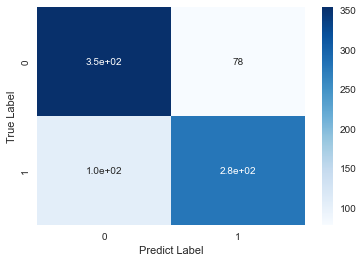

In [98]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred_new1, target_names=["LOW","HIGH"]),'\n')
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_new1),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_new1).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

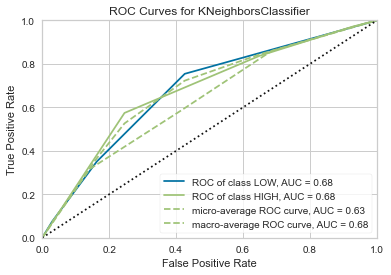

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [99]:
visualizer = ROCAUC(knn, classes=["LOW","HIGH"])
visualizer.fit(X_train_norm, y_train)        
visualizer.score(X_train_norm,y_train.astype(int))       
visualizer.show()   